In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import folium

In [2]:


# Try different encodings such as 'latin1', 'iso-8859-1', etc.
df = pd.read_csv("zomato_restaurants_in_India.csv", encoding='latin1')


In [3]:
df.head()

res_id                            name      establishment   
0  3400299                     Bikanervala    ['Quick Bites']  \
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url   
0  https://www.zomato.com/agra/bikanervala-khanda...  \
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id   
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34  \
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ... price_range  currency   
0     Khandari  27.211450  78.002381  ...           2       Rs.  \
1   Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2     Shahganj  27.182938  77.979684  ...           1       Rs.   
3  Civil Lines  27.205668  78.004799  ...           1       Rs.   
4      Tajganj  27.157709  78.052421  ...           3       Rs.   

                                          highlights aggregate_rating   
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4  \
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  
3   Very Good    693          157               0.0        1        -1  
4   Excellent    470          291               0.0        1        -1  

[5 rows x 26 columns]

In [4]:
df

res_id                            name      establishment   
0        3400299                     Bikanervala    ['Quick Bites']  \
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe          ['CafÃ©']   

                                                      url   
0       https://www.zomato.com/agra/bikanervala-khanda...  \
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id   
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34  \
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

           locality   latitude  longitude  ... price_range  currency   
0          Khandari  27.211450  78.002381  ...           2       Rs.  \
1        Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2          Shahganj  27.182938  77.979684  ...           1       Rs.   
3       Civil Lines  27.205668  78.004799  ...           1       Rs.   
4           Tajganj  27.157709  78.052421  ...           3       Rs.   
...             ...        ...        ...  ...         ...       ...   
211939    Fatehgunj  22.336931  73.192356  ...           2       Rs.   
211940   Karelibaug  22.322455  73.197203  ...           1       Rs.   
211941     Alkapuri  22.310563  73.171163  ...           2       Rs.   
211942        Akota  22.270027  73.143068  ...           2       Rs.   
211943     Vadiwadi  22.309935  73.158768  ...           2       Rs.   

                                               highlights aggregate_rating   
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4  \
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Ind

In [5]:


# Try different encodings such as 'latin1', 'iso-8859-1', etc.
df1 = pd.read_csv("Zomato_delivery.csv", encoding='latin1')


In [6]:
df1

Order_dispatch       lati        lon
0                1  27.195836  77.998213
1                0  27.229968  78.003268
2                0  27.158243  78.045591
3                1  27.201460  78.007529
4                1  27.216269  78.020942
5                0  27.207408  77.987097
6                1  27.201657  78.007777
7                0  27.201759  77.951967
8                1  27.179937  78.002668
9                1  27.161661  78.011544
10               1  27.198617  78.003468

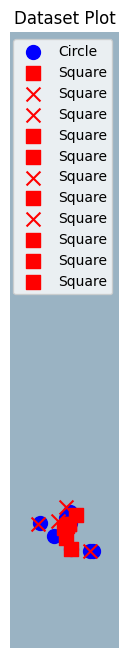

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# First dataset (circle)
loc_y_circle = np.array([27.21145, 27.1605689, 27.18293767, 27.20566794, 27.1577095, 27.20151564, 27.22217513, 27.20393, 27.2041478, 27.15824318])
loc_x_circle = np.array([78.00238056, 78.0115831, 77.97968365, 78.00479852, 78.0524211, 78.00755583, 78.01017366, 77.95426, 78.0090248, 78.04559089])

# Second dataset (square)
data_square = {
    'Order_dispatch': [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1],
    'lati': [27.195836, 27.22996766, 27.15824318, 27.20146017, 27.21626881, 27.2074083, 27.201657, 27.2017586, 27.1799367, 27.16166111, 27.198617],
    'lon': [77.998213, 78.00326765, 78.04559089, 78.00752901, 78.02094206, 77.9870967, 78.007777, 77.9519673, 78.0026685, 78.01154444, 78.003468]
}

square = pd.DataFrame(data_square)

# Plotting
plt.figure(figsize=(10, 8))

# Create Basemap object
m = Basemap(projection='merc', llcrnrlat=27, urcrnrlat=28, llcrnrlon=77.9, urcrnrlon=78.1, resolution='i')

# Draw map boundaries, coastlines, and countries
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(linewidth=0.1, color="white")

# Plot circles
m.scatter(loc_x_circle, loc_y_circle, latlon=True, s=100, color='blue', marker='o', label='Circle')

# Plot squares
for index, row in square.iterrows():
    if row['Order_dispatch'] == 1:
        marker = 's'  # Square
    else:
        marker = 'x'  # Cross
    m.scatter(row['lon'], row['lati'], latlon=True, s=100, color='red', marker=marker, label='Square')

plt.title('Dataset Plot')
plt.legend()
plt.show()


In [8]:
import folium

# Create a map centered around the mean latitude and longitude of both datasets
mean_lat = (np.mean(loc_y_circle) + square['lati'].mean()) / 2
mean_lon = (np.mean(loc_x_circle) + square['lon'].mean()) / 2
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Plot circles from the first dataset
for lat, lon in zip(loc_y_circle, loc_x_circle):
    folium.CircleMarker(location=[lat, lon], radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

# Plot squares from the second dataset
for index, row in square.iterrows():
    color = 'green' if row['Order_dispatch'] == 1 else 'red'
    icon = folium.Icon(color=color, icon='info-sign')
    folium.Marker(location=[row['lati'], row['lon']], icon=icon).add_to(m)

# Display the map
m


In [9]:
import folium

# Restaurant coordinates
restaurant_coordinates = zip(loc_y_circle, loc_x_circle)

# Delivery boy coordinates
delivery_boy_coordinates = zip(square['lati'], square['lon'])

# Create a map centered around the mean latitude and longitude of both datasets
mean_lat = (np.mean(loc_y_circle) + square['lati'].mean()) / 2
mean_lon = (np.mean(loc_x_circle) + square['lon'].mean()) / 2
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

# Plot restaurants as circles
for lat, lon in restaurant_coordinates:
    folium.CircleMarker(location=[lat, lon], radius=5, color='blue', fill=True, fill_color='blue').add_to(m)

# Plot delivery boys as squares
for lat, lon in delivery_boy_coordinates:
    folium.Marker(location=[lat, lon], icon=folium.Icon(color='red', icon='male', prefix='fa')).add_to(m)

# Display the map
m


In [10]:
from geopy.distance import geodesic

# Restaurant coordinates
restaurant_coords = (27.21145, 78.00238056)  # Example restaurant coordinates

# Delivery boy coordinates
delivery_boy_coords = list(zip(square['lati'], square['lon']))

# Calculate distances
distances = [(index, geodesic(restaurant_coords, (lat, lon)).kilometers) for index, (lat, lon) in enumerate(delivery_boy_coords)]

# Find the nearest delivery boy
nearest_delivery_boy_index, nearest_distance = min(distances, key=lambda x: x[1])
nearest_delivery_boy_coords = delivery_boy_coords[nearest_delivery_boy_index]

print("Nearest delivery boy coordinates:", nearest_delivery_boy_coords)
print("Distance to nearest delivery boy:", nearest_distance, "kilometers")


Nearest delivery boy coordinates: (27.201657, 78.007777)
Distance to nearest delivery boy: 1.2096899451659677 kilometers


In [11]:
# Simulate making a call to the nearest delivery boy
print("Calling the nearest delivery boy at coordinates:", nearest_delivery_boy_coords)


Calling the nearest delivery boy at coordinates: (27.201657, 78.007777)


In [12]:
import folium

# Create a map centered around the restaurant and the nearest delivery boy
m = folium.Map(location=restaurant_coords, zoom_start=14)

# Add marker for the restaurant
folium.Marker(location=restaurant_coords, popup='Restaurant', icon=folium.Icon(color='blue', icon='cutlery')).add_to(m)

# Add marker for the nearest delivery boy
folium.Marker(location=nearest_delivery_boy_coords, popup='Nearest Delivery Boy', icon=folium.Icon(color='red', icon='user')).add_to(m)

# Draw a line between the restaurant and the nearest delivery boy
folium.PolyLine(locations=[restaurant_coords, nearest_delivery_boy_coords], color='green').add_to(m)

# Display the map
m


In [13]:
import numpy as np

rnd = np.random

rnd.seed(0)

In [14]:
import requests

url = "https://trueway-geocoding.p.rapidapi.com/Geocode"

querystring = {"address":"505 Howard St, San Francisco","language":"en"}

headers= {

    "X-RapidAPI-Key": "954bd9e800mshf505c10f126c98dp193b7cjsnf78c048d56c5",
    "X-RapidAPI-Host": "trueway-geocoding.p.rapidapi.com"

}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)



{"results":[{"address":"505 Howard St, San Francisco, CA 94105, USA","postal_code":"94105","country":"United States","region":"California","area":"San Francisco County","locality":"San Francisco","neighborhood":"SoMa","street":"Howard Street","house":"505","location":{"lat":37.787926,"lng":-122.396187},"location_type":"exact","type":"street_address"}]}


In [15]:
n = 4 # the number of clientes

Q = 500 # vehicle capacity

N =[i for i in range(1, n+1)] # set of clients

V =[0] + N # set of nodes or vetices

q ={i: rnd.randint(1, 10) for i in N }# demand of each client

In [16]:
#input

loc_y= np.array([27.21145, 27.1605689, 27.18293767, 27.20566794, 27.1577095, 27.20151564, 27.22217513, 27.20393, 27.2041478, 27.15824318])

loc_x= np.array([78.00238056, 78.0115831, 77.97968365, 78.00479852, 78.0524211, 78.00755583, 78.01017366, 77.95426, 78.0090248, 78.04559089])

(77.949351945, 78.057329155, 27.1544862185, 27.2253984115)

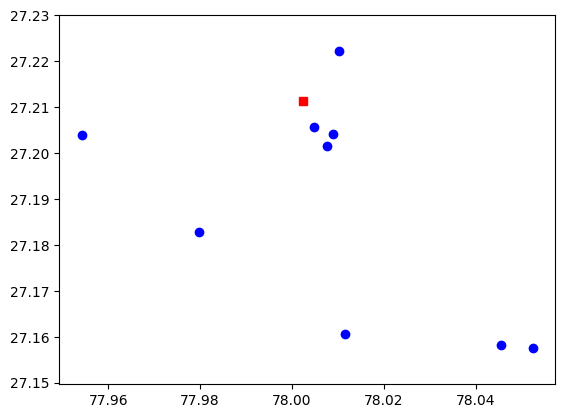

In [17]:
import matplotlib.pyplot as plt

plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in N:

     plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))

plt.plot(loc_x[0], loc_y[0], c='r', marker='s')

plt.axis('equal')

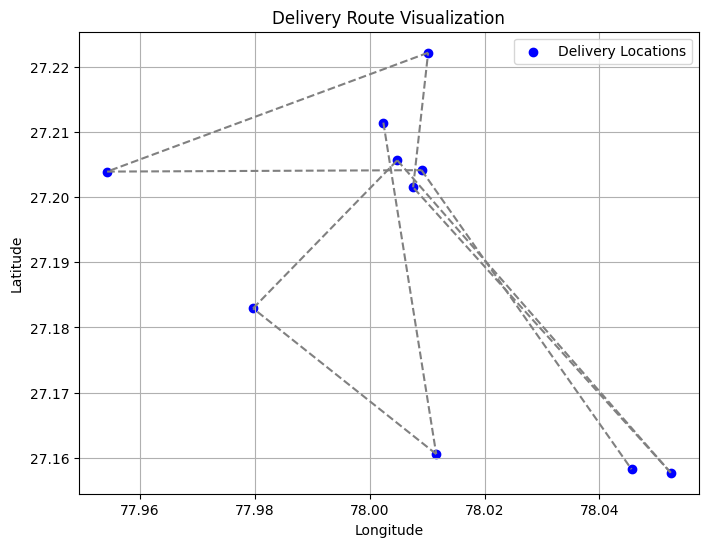

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Given coordinates
loc_y = np.array([27.21145, 27.1605689, 27.18293767, 27.20566794, 27.1577095, 27.20151564, 27.22217513, 27.20393, 27.2041478, 27.15824318])
loc_x = np.array([78.00238056, 78.0115831, 77.97968365, 78.00479852, 78.0524211, 78.00755583, 78.01017366, 77.95426, 78.0090248, 78.04559089])

# Plot the coordinates
plt.figure(figsize=(8, 6))
plt.scatter(loc_x, loc_y, color='blue', label='Delivery Locations')

# Connect the coordinates
for i in range(len(loc_x) - 1):
    plt.plot([loc_x[i], loc_x[i + 1]], [loc_y[i], loc_y[i + 1]], color='gray', linestyle='--')

# Add labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delivery Route Visualization')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [19]:
import plotly.graph_objects as go

# Set your Mapbox access token
mapbox_access_token = 'pk.eyJ1IjoicnVkcmExMjMiLCJhIjoiY2xzdGRwcnk2MW1wYjJqbnMxdTRkdGd6ciJ9.34HDukE1i19rsI-CJQpnZg'

# Given coordinates
loc_y = [27.21145, 27.1605689, 27.18293767, 27.20566794, 27.1577095, 27.20151564, 27.22217513, 27.20393, 27.2041478, 27.15824318]
loc_x = [78.00238056, 78.0115831, 77.97968365, 78.00479852, 78.0524211, 78.00755583, 78.01017366, 77.95426, 78.0090248, 78.04559089]

# Create a scattermapbox plot
fig = go.Figure(go.Scattermapbox(
    lat=loc_y,
    lon=loc_x,
    mode='markers',
    marker=dict(
        size=10,
        color='blue',
        opacity=0.7,
    ),
    text=['Location {}'.format(i + 1) for i in range(len(loc_x))],
))

# Set mapbox style
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        center=dict(lat=sum(loc_y) / len(loc_y), lon=sum(loc_x) / len(loc_x)),
        zoom=10,
    ),
    title='Delivery Route Visualization',
)

# Show the plot
fig.show()


In [20]:
import plotly.graph_objects as go

# Set your Mapbox access token
mapbox_access_token = 'pk.eyJ1IjoicnVkcmExMjMiLCJhIjoiY2xzdGRwcnk2MW1wYjJqbnMxdTRkdGd6ciJ9.34HDukE1i19rsI-CJQpnZg'

# Given coordinates
loc_y = [27.21145, 27.1605689, 27.18293767, 27.20566794, 27.1577095, 27.20151564, 27.22217513, 27.20393, 27.2041478, 27.15824318]
loc_x = [78.00238056, 78.0115831, 77.97968365, 78.00479852, 78.0524211, 78.00755583, 78.01017366, 77.95426, 78.0090248, 78.04559089]

# Create a scattermapbox plot
fig = go.Figure(go.Scattermapbox(
    lat=loc_y,
    lon=loc_x,
    mode='markers+lines',  # Connect the markers with lines
    marker=dict(
        size=10,
        color='blue',
        opacity=0.7,
    ),
    text=['Location {}'.format(i + 1) for i in range(len(loc_x))],
))

# Set mapbox style
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        center=dict(lat=sum(loc_y) / len(loc_y), lon=sum(loc_x) / len(loc_x)),
        zoom=10,
    ),
    title='Delivery Route Visualization',
)

# Show the plot
fig.show()


In [21]:
import openrouteservice as ors 
import folium 

In [22]:
client = ors.Client (key='5b3ce3597851110001cf6248ca2445bae9704c6c898e71276ad6b0c7')

In [23]:
m = folium.Map(location=list(reversed([78.00238056,27.21145])), tiles="cartodbpositron", zoom_start=13)


coords = [[78.00238056, 27.21145], [78.04559089, 27.15824318]]
route = client.directions(coordinates=coords,
                        profile= 'driving-car', 
                        format='geojson')

folium.PolyLine(locations=[list(reversed (coord)) for coord in route['features'][0]['geometry']['coordinates']], color="Red").add_to(m)


In [24]:
m.save('map.html')

In [25]:
m

In [26]:
import numpy as np

rnd = np.random

rnd.seed(0)

In [27]:
import requests

url = "https://trueway-geocoding.p.rapidapi.com/Geocode"

querystring = {"address":"505 Howard St, San Francisco","language":"en"}

headers= {

    "X-RapidAPI-Key": "954bd9e800mshf505c10f126c98dp193b7cjsnf78c048d56c5",
    "X-RapidAPI-Host": "trueway-geocoding.p.rapidapi.com"

}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)



{"results":[{"address":"505 Howard St, San Francisco, CA 94105, USA","postal_code":"94105","country":"United States","region":"California","area":"San Francisco County","locality":"San Francisco","neighborhood":"SoMa","street":"Howard Street","house":"505","location":{"lat":37.787926,"lng":-122.396187},"location_type":"exact","type":"street_address"}]}


In [28]:
n = 4 # the number of clientes

Q = 500 # vehicle capacity

N =[i for i in range(1, n+1)] # set of clients

V =[0] + N # set of nodes or vetices

q ={i: rnd.randint(1, 10) for i in N }# demand of each client

In [29]:
#input

loc_y= np.array([27.21145, 27.1605689, 27.18293767, 27.20566794, 27.1577095, 27.20151564, 27.22217513, 27.20393, 27.2041478, 27.15824318])

loc_x= np.array([78.00238056, 78.0115831, 77.97968365, 78.00479852, 78.0524211, 78.00755583, 78.01017366, 77.95426, 78.0090248, 78.04559089])

In [30]:
from docplex.mp.model import Model 
md1 = Model('CVRP')

In [31]:
A = [(i, j) for i in V for j in V if i !=j]

c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}

print(A, "\n")

print(c)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)] 

{(0, 1): 0.05170660576426584, (0, 2): 0.0364431431901426, (0, 3): 0.006267275995607505, (0, 4): 0.07343089937990249, (1, 0): 0.05170660576426584, (1, 2): 0.03896070817651073, (1, 3): 0.04560651197688811, (1, 4): 0.04093798251453848, (2, 0): 0.0364431431901426, (2, 1): 0.03896070817651073, (2, 3): 0.03387361612508483, (2, 4): 0.07698829257784763, (3, 0): 0.006267275995607505, (3, 1): 0.04560651197688811, (3, 2): 0.03387361612508483, (3, 4): 0.06758640464687482, (4, 0): 0.07343089937990249, (4, 1): 0.04093798251453848, (4, 2): 0.07698829257784763, (4, 3): 0.06758640464687482}


In [32]:
x =md1.binary_var_dict(A, name='x')

u =md1.continuous_var_dict(N, ub=Q, name='u')

u

{1: docplex.mp.Var(type=C,name='u_1',ub=500),
 2: docplex.mp.Var(type=C,name='u_2',ub=500),
 3: docplex.mp.Var(type=C,name='u_3',ub=500),
 4: docplex.mp.Var(type=C,name='u_4',ub=500)}

In [33]:
md1.minimize(md1.sum(c[i, j]*x[i, j] for i, j in A))

md1.add_constraints(md1.sum(x[i, j] for j in V if j != i) == 1 for i in N)
md1.add_constraints(md1.sum(x[i, j] for i in V if i != j) == 1 for j in N)

md1.add_indicator_constraints(md1.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)

md1.add_constraints(u[i] >= q[i] for i in N)

md1.parameters.timelimit = 15

solution = md1.solve(log_output=True)

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 0.335696 after 0.20 sec. (0.00 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 4 rows and 0 columns.
MIP Presolve modified 6 coefficients.
Aggregator did 6 substitutions.
Reduced MIP has 14 rows, 30 columns, and 50 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 12 indicators.
Presolve time = 0.75 sec. (0.06 ticks)
Probing time = 0.05 sec. (0.02 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 14 rows, 30 columns, and 50 nonzeros.
Reduced MIP has 20 binaries, 0 generals, 0 SOSs, and 12 indicators.
Presolve time = 0.03 sec. (0.04 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Clique table members: 14.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution ti

In [34]:
print(solution)

solution for: CVRP
objective: 0.190196
status: OPTIMAL_SOLUTION(2)
x_0_3=1
x_1_2=1
x_2_0=1
x_3_4=1
x_4_1=1
u_1=14.000
u_2=15.000
u_3=4.000
u_4=8.000



(77.949351945, 78.057329155, 27.1544862185, 27.2253984115)

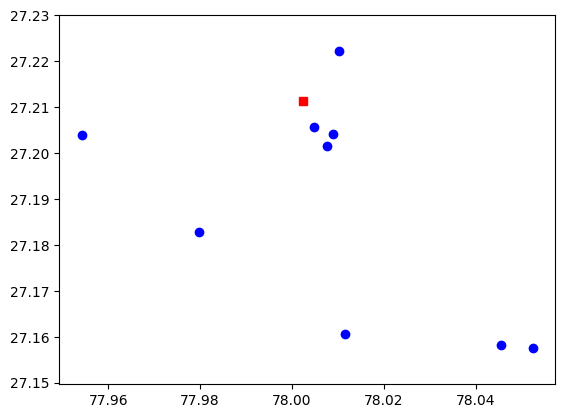

In [35]:
import matplotlib.pyplot as plt

plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in N:

     plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))

plt.plot(loc_x[0], loc_y[0], c='r', marker='s')

plt.axis('equal')

In [36]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(77.949351945, 78.057329155, 27.1544862185, 27.2253984115)

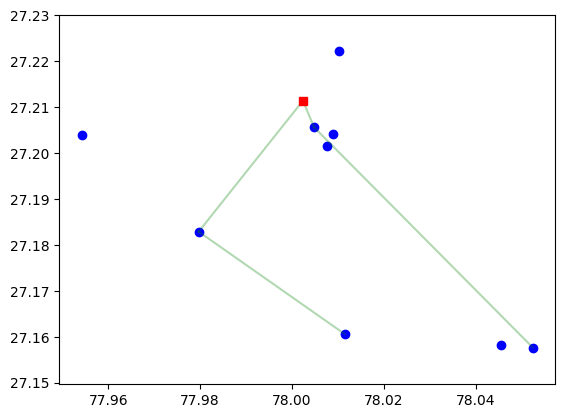

In [37]:
import matplotlib.pyplot as plt
plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in N:

    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))

for i, j in active_arcs[:-1]:

    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)

plt.plot(loc_x[0], loc_y[0], c='r', marker='s')

plt.axis('equal') 

In [38]:
import folium 
from folium import plugins

#create map

m = folium.Map(location=[loc_y.mean(), loc_x.mean()], zoom_start=10)

#add home

folium.Marker([loc_y[0], loc_x[0]], popup ='Home', icon = folium.Icon(color='red', icon="home")).add_to(m)

#add markers

for i in N:

    folium.Marker([loc_y[i], loc_x[i]], popup=(loc_y[i], loc_x[i])).add_to(m)

#add Lines

for i, j in active_arcs[:-1]:

    folium.PolyLine(locations=[[loc_y[i], loc_x[i]], [loc_y[j], loc_x[j]]], color='red', weight=2.5, opacity=1).add_to(m)

# display map
m

In [39]:
print(active_arcs) 
sorted_coords = [active_arcs[0]]

while len(sorted_coords)!=len(active_arcs):

    for i in active_arcs:

        if i in sorted_coords:

            continue

        last = len(sorted_coords)-1

        print(sorted_coords)

        if sorted_coords [last][1] == i[0]:

            sorted_coords.append(i)

[(0, 3), (1, 2), (2, 0), (3, 4), (4, 1)]
[(0, 3)]
[(0, 3)]
[(0, 3)]
[(0, 3), (3, 4)]
[(0, 3), (3, 4), (4, 1)]
[(0, 3), (3, 4), (4, 1), (1, 2)]


In [40]:
stops_arranged = ""

for i, j in sorted_coords:

    stops_arranged+=loc_y[i].astype(str)+","+loc_x[i].astype(str)+"|" 
    print(stops_arranged)

27.21145,78.00238056|
27.21145,78.00238056|27.20566794,78.00479852|
27.21145,78.00238056|27.20566794,78.00479852|27.1577095,78.0524211|
27.21145,78.00238056|27.20566794,78.00479852|27.1577095,78.0524211|27.1605689,78.0115831|
27.21145,78.00238056|27.20566794,78.00479852|27.1577095,78.0524211|27.1605689,78.0115831|27.18293767,77.97968365|


In [41]:
import requests

url = "https://trueway-directions2.p.rapidapi.com/FindDrivingRoute"

querystring = {"stops": stops_arranged}

headers = {

    "X-RapidAPI-Key": "954bd9e800mshf505c10f126c98dp193b7cjsnf78c048d56c5",

    "X-RapidAPI-Host": "trueway-directions2.p.rapidapi.com"

}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"route":{"distance":21084,"duration":3412,"bounds":{"south":27.157529,"west":77.979742,"north":27.21149,"east":78.052529},"geometry":{"coordinates":[[27.211471,78.00237],[27.211471,78.002289],[27.21148,78.002045],[27.21148,78.001985],[27.21148,78.001843],[27.21148,78.001661],[27.21149,78.001509],[27.211451,78.000986],[27.211451,78.000906],[27.211431,78.000556],[27.211402,78.000317],[27.211372,78.000098],[27.211363,78.000088],[27.211323,77.999959],[27.211304,77.999821],[27.211294,77.999761],[27.211284,77.999672],[27.211274,77.999564],[27.211265,77.999435],[27.211235,77.998874],[27.211137,77.998884],[27.211098,77.998893],[27.21098,77.998933],[27.210557,77.99909],[27.210429,77.999139],[27.21031,77.999189],[27.21029,77.999208],[27.210271,77.999218],[27.210261,77.999248],[27.210251,77.999268],[27.210231,77.999386],[27.210221,77.999406],[27.210211,77.999455],[27.210142,77.999811],[27.210132,77.99986],[27.210112,77.9999],[27.210103,77.99991],[27.210073,77.99992],[27.210053,77.99993],[27.2098

In [42]:
import json

data = json.loads(response.text)

coords=(data['route']['geometry']['coordinates'])

for i,k in coords:

    print(i,k)

27.211471 78.00237
27.211471 78.002289
27.21148 78.002045
27.21148 78.001985
27.21148 78.001843
27.21148 78.001661
27.21149 78.001509
27.211451 78.000986
27.211451 78.000906
27.211431 78.000556
27.211402 78.000317
27.211372 78.000098
27.211363 78.000088
27.211323 77.999959
27.211304 77.999821
27.211294 77.999761
27.211284 77.999672
27.211274 77.999564
27.211265 77.999435
27.211235 77.998874
27.211137 77.998884
27.211098 77.998893
27.21098 77.998933
27.210557 77.99909
27.210429 77.999139
27.21031 77.999189
27.21029 77.999208
27.210271 77.999218
27.210261 77.999248
27.210251 77.999268
27.210231 77.999386
27.210221 77.999406
27.210211 77.999455
27.210142 77.999811
27.210132 77.99986
27.210112 77.9999
27.210103 77.99991
27.210073 77.99992
27.210053 77.99993
27.209865 77.9999
27.209805 77.9999
27.209566 77.99987
27.209167 77.999831
27.208261 77.999751
27.207926 77.999722
27.207926 77.999781
27.207916 77.99986
27.207916 77.999979
27.207926 78.000118
27.207916 78.000198
27.207916 78.000267
27

In [43]:
import folium

import pandas as pd


def create_map(response):
    
    mls = response

    points = [(i,k) for i,k in mls]

    m = folium.Map(location=[loc_y.mean(), loc_x.mean()], zoom_start=10)

#add marker

    folium.Marker([loc_y[0], loc_x[0]], popup='Home', icon=folium.Icon(color='red', icon = 'home')).add_to(m)

    for i in N:

        folium.Marker([loc_y[i], loc_x[i]], popup='q_%d=%d' % (i, q[i])).add_to(m) 
        folium.PolyLine(points, weight=5, opacity=1).add_to(m)

        return m

    
m = create_map(coords)

m

Route length: 5.73 kilometers


Route length: 5.06 kilometers


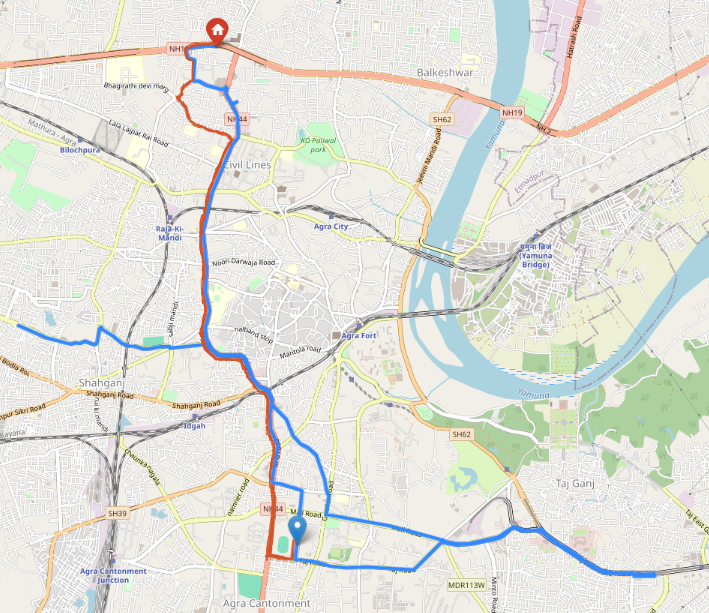

In [47]:
from IPython.display import Image, display

# Displaying a local image
image_path = 'compair routes.png'
display(Image(filename=image_path))

# # Displaying an image from a URL
# image_url = 'https://example.com/path_to_your_image.jpg'
# display(Image(url=image_url))


In [48]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula.
    """
    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Coordinates for starting and ending points
start_lat, start_lon = 27.21145, 78.00238056
end_lat, end_lon = 27.1605689, 78.0115831

# Calculate the distance
route_length_km = haversine(start_lat, start_lon, end_lat, end_lon)
print(f"Route length: {route_length_km:.2f} kilometers")


Route length: 5.73 kilometers


In [49]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula.
    """
    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Coordinates for starting and ending points
start_lat, start_lon = (27.20566794, 78.00479852)
end_lat, end_lon = 27.1605689, 78.0115831

# Calculate the distance
route_length_km = haversine(start_lat, start_lon, end_lat, end_lon)
print(f"Route length: {route_length_km:.2f} kilometers")


Route length: 5.06 kilometers
